In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pathlib

In [10]:
# Load the CSV file to examine its content
file_path = pathlib.Path('~/Developer/code/patient-note-alignment/reports/data/segmentation_experiments.csv').expanduser()
df = pd.read_csv(file_path, delimiter=',')

# Display the first few rows and the column names to understand the structure
df.head(), df.columns

(            Start Time Duration                            Run ID  \
 0  2024-09-14 22:46:43  12.4min  06cad34106534d81a5cf060902e2f91d   
 1  2024-09-14 22:34:11  12.5min  95625a96312948f5b9fc56638cda8348   
 2  2024-09-14 22:21:44  12.4min  ff389d171b6a4079b0badb329f4b9522   
 3  2024-09-14 22:09:05  12.6min  e311fd853c174ab68c4ea9a90405b9dc   
 4  2024-09-14 22:07:17  11.3min  b4a7815008444c398d16eb2e03fe7a78   
 
                                        Name Source Type  \
 0  Meta-Llama-3.1-70B-Instruct-loft-50shots       LOCAL   
 1  Meta-Llama-3.1-70B-Instruct-loft-50shots       LOCAL   
 2  Meta-Llama-3.1-70B-Instruct-loft-50shots       LOCAL   
 3  Meta-Llama-3.1-70B-Instruct-loft-50shots       LOCAL   
 4  Meta-Llama-3.1-70B-Instruct-loft-50shots       LOCAL   
 
                       Source Name User    Status  \
 0  scripts/benchmark_alignment.py  amo  FINISHED   
 1  scripts/benchmark_alignment.py  amo  FINISHED   
 2  scripts/benchmark_alignment.py  amo  FINISHED   
 3  

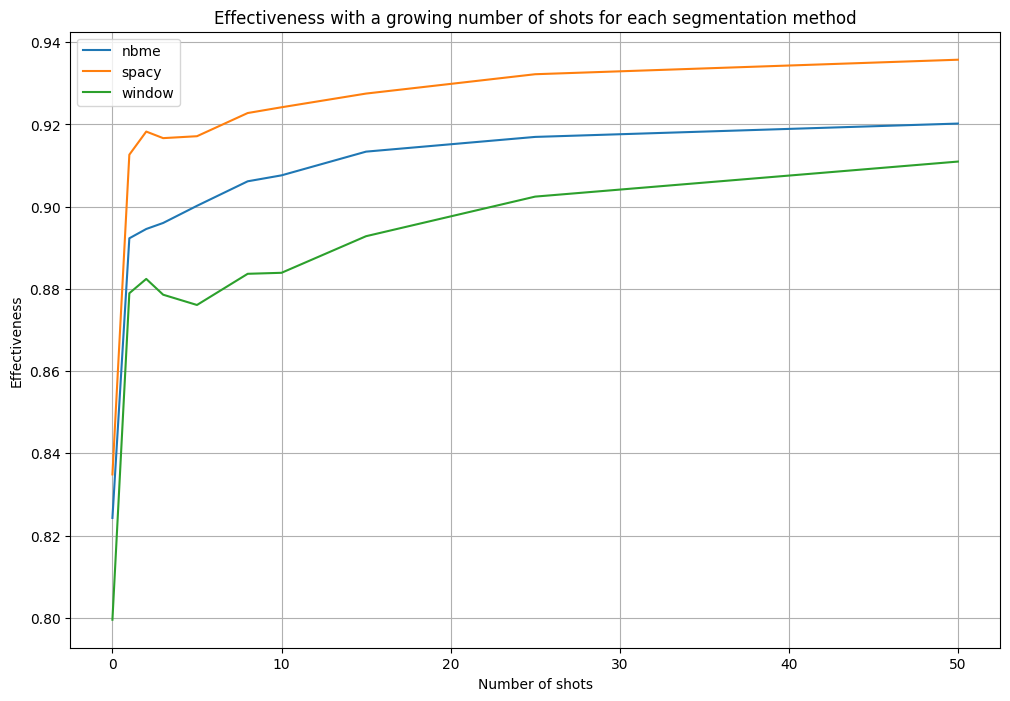

In [17]:
# Aggregating the data to calculate mean, min, and max for precision/mean
agg_df = df.groupby(['num_shots', 'segmenter'])['f1_score/mean'].agg(['mean', 'min', 'max']).reset_index()

# Plotting the line chart with shaded areas
plt.figure(figsize=(12, 8))
for segmenter in agg_df['segmenter'].unique():
    subset = agg_df[agg_df['segmenter'] == segmenter]
    plt.plot(subset['num_shots'], subset['mean'], label=segmenter)
    # plt.fill_between(subset['num_shots'], subset['min'], subset['max'], alpha=0.2)

plt.xlabel('Number of shots')
plt.ylabel('Effectiveness')
plt.title('Effectiveness with a growing number of shots for each segmentation method')
plt.legend(title=None)
plt.grid(True)
plt.show()

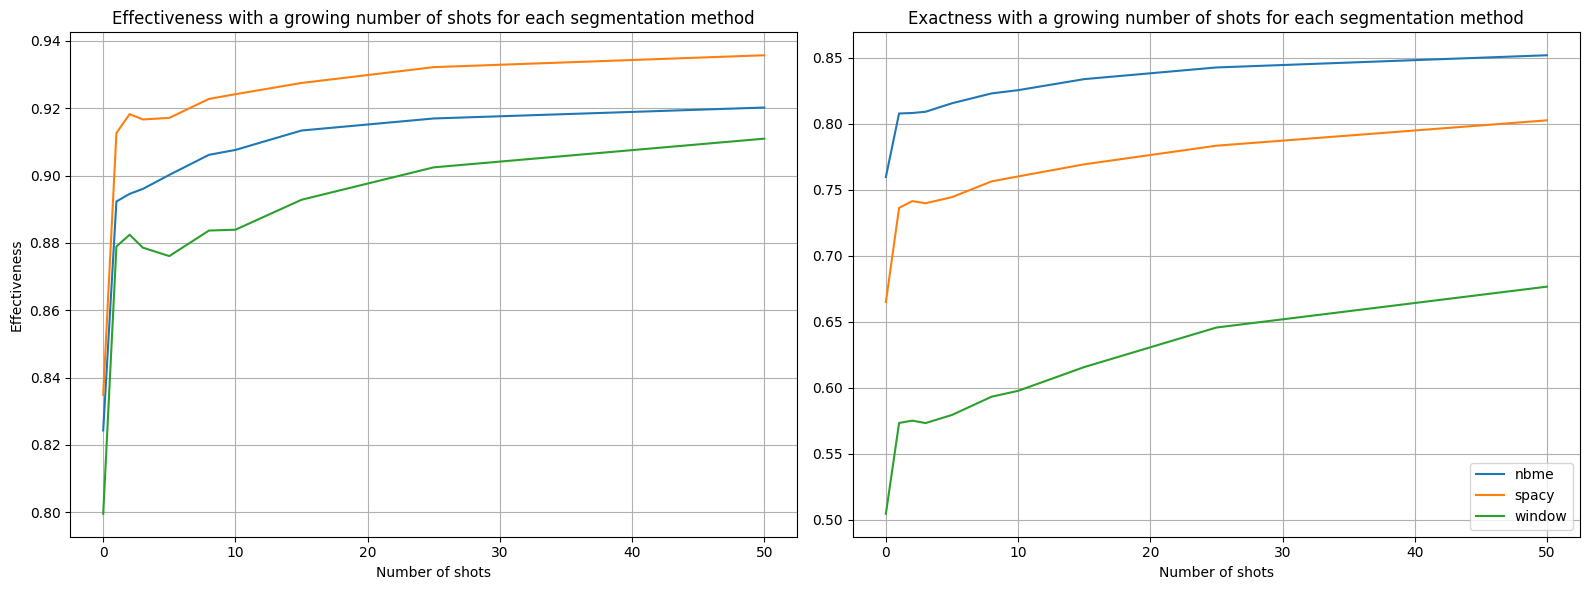

In [20]:
agg_df1 = df.groupby(['num_shots', 'segmenter'])['f1_score/mean'].agg(['mean', 'min', 'max']).reset_index()
agg_df2 = df.groupby(['num_shots', 'segmenter'])['exact_match/mean'].agg(['mean', 'min', 'max']).reset_index()

# Creating a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the first metric (f1_score/mean) on the first subplot
for segmenter in agg_df1['segmenter'].unique():
    subset = agg_df1[agg_df1['segmenter'] == segmenter]
    axes[0].plot(subset['num_shots'], subset['mean'], label=segmenter)

axes[0].set_xlabel('Number of shots')
axes[0].set_ylabel('Effectiveness')
axes[0].set_title('Effectiveness with a growing number of shots for each segmentation method')
axes[0].grid(True)

# Plotting the second metric (another_metric/mean) on the second subplot
for segmenter in agg_df2['segmenter'].unique():
    subset2 = agg_df2[agg_df2['segmenter'] == segmenter]
    axes[1].plot(subset2['num_shots'], subset2['mean'], label=segmenter)

axes[1].set_xlabel('Number of shots')
axes[1].set_title('Exactness with a growing number of shots for each segmentation method')
axes[1].legend(title=None)
axes[1].grid(True)

# Adjusting layout and displaying the plots
plt.tight_layout()
plt.show()


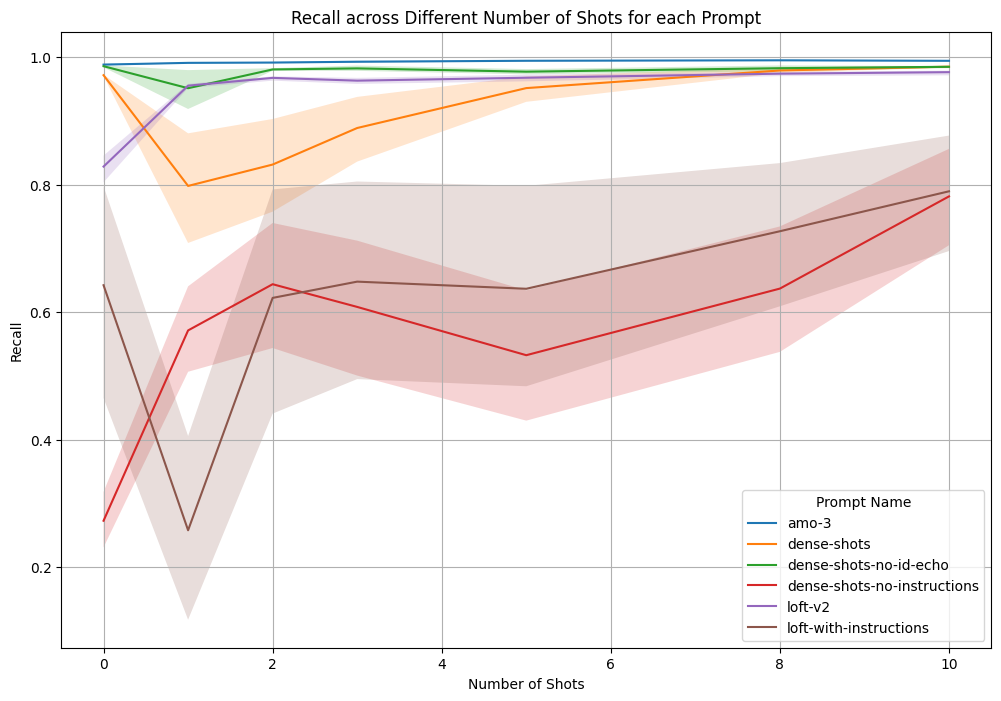

In [6]:
# Aggregating the data to calculate mean, min, and max for precision/mean
agg_df = df.groupby(['num_shots', 'prompt_name'])['recall/mean'].agg(['mean', 'min', 'max']).reset_index()

# Plotting the line chart with shaded areas
plt.figure(figsize=(12, 8))
for prompt in agg_df['prompt_name'].unique():
    subset = agg_df[agg_df['prompt_name'] == prompt]
    plt.plot(subset['num_shots'], subset['mean'], label=prompt)
    plt.fill_between(subset['num_shots'], subset['min'], subset['max'], alpha=0.2)

plt.xlabel('Number of Shots')
plt.ylabel('Recall')
plt.title('Recall across Different Number of Shots for each Prompt')
plt.legend(title='Prompt Name')
plt.grid(True)
plt.show()

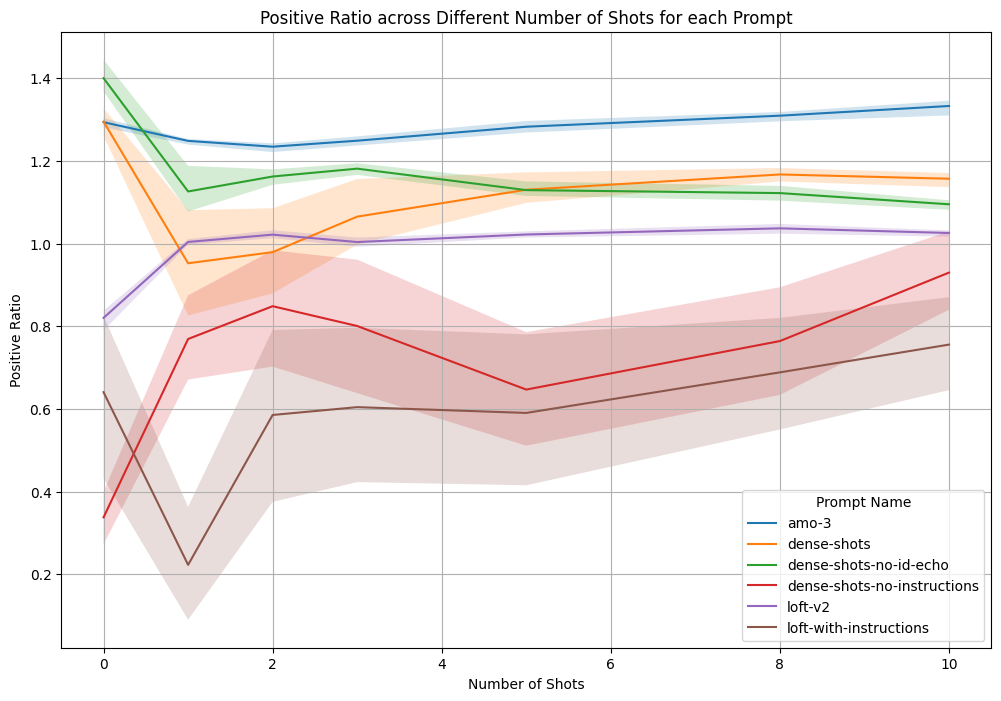

In [7]:
# Aggregating the data to calculate mean, min, and max for precision/mean
agg_df = df.groupby(['num_shots', 'prompt_name'])['positive_ratio/mean'].agg(['mean', 'min', 'max']).reset_index()

# Plotting the line chart with shaded areas
plt.figure(figsize=(12, 8))
for prompt in agg_df['prompt_name'].unique():
    subset = agg_df[agg_df['prompt_name'] == prompt]
    plt.plot(subset['num_shots'], subset['mean'], label=prompt)
    plt.fill_between(subset['num_shots'], subset['min'], subset['max'], alpha=0.2)

plt.xlabel('Number of Shots')
plt.ylabel('Positive Ratio')
plt.title('Positive Ratio across Different Number of Shots for each Prompt')
plt.legend(title='Prompt Name')
plt.grid(True)
plt.show()

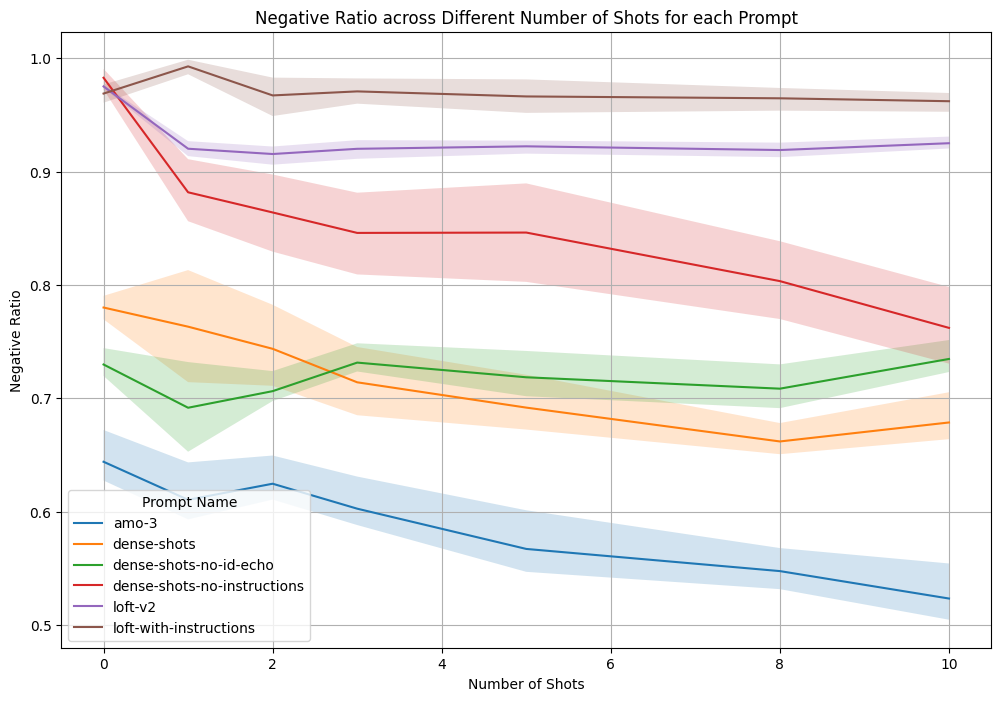

In [8]:
# Aggregating the data to calculate mean, min, and max for precision/mean
agg_df = df.groupby(['num_shots', 'prompt_name'])['negative_ratio/mean'].agg(['mean', 'min', 'max']).reset_index()

# Plotting the line chart with shaded areas
plt.figure(figsize=(12, 8))
for prompt in agg_df['prompt_name'].unique():
    subset = agg_df[agg_df['prompt_name'] == prompt]
    plt.plot(subset['num_shots'], subset['mean'], label=prompt)
    plt.fill_between(subset['num_shots'], subset['min'], subset['max'], alpha=0.2)

plt.xlabel('Number of Shots')
plt.ylabel('Negative Ratio')
plt.title('Negative Ratio across Different Number of Shots for each Prompt')
plt.legend(title='Prompt Name')
plt.grid(True)
plt.show()